# Run multi-scenario compatible U-FaIR

This script gives an example of running the U-FaIR model over 3 gases (CO2, CH4 and N2O) of the 4 main RCP emissions databases (RCP3,4.5,6,8.5).

First example uses inbuilt function __run_RCPs()__ to calculate and plot the RCP concentrations and temperature responses to emissions inputs. 

Second example shows how to format a run oneself. 

### Imports

In [2]:
from matplotlib import pyplot as plt
from fiveEqSCM_multiscen import *

## RCP run with inbuilt (demo) U-FaIR functions

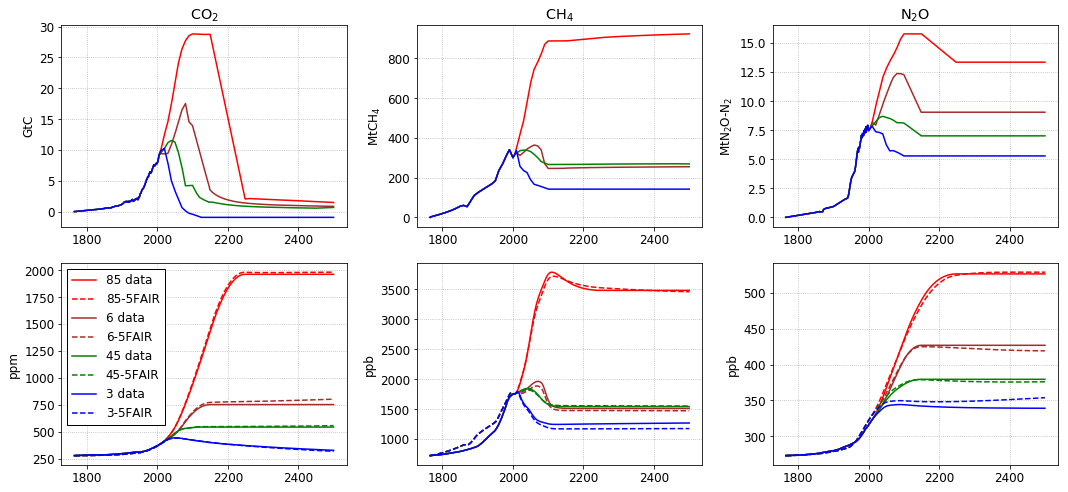

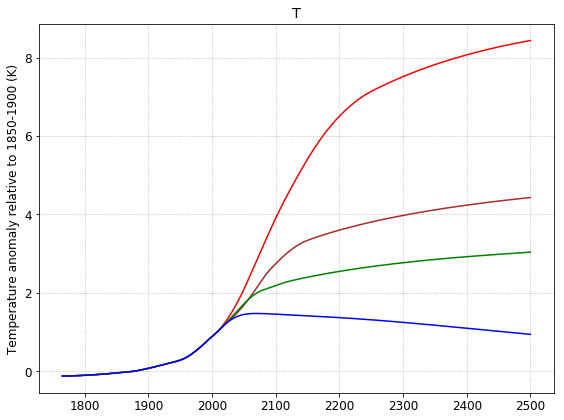

In [3]:
RCP_results, fig_C, ax_C, fig_T, ax_T = run_RCPs(rcps= ['85','6','45','3'], plot_out=True)

## How to format a run: RCP emissions to temperature components

Emissions input is 2D (n_scenarios, n_timesteps)
Emissions input is 2D (n_scenarios, n_timesteps)
Emissions input is 2D (n_scenarios, n_timesteps)


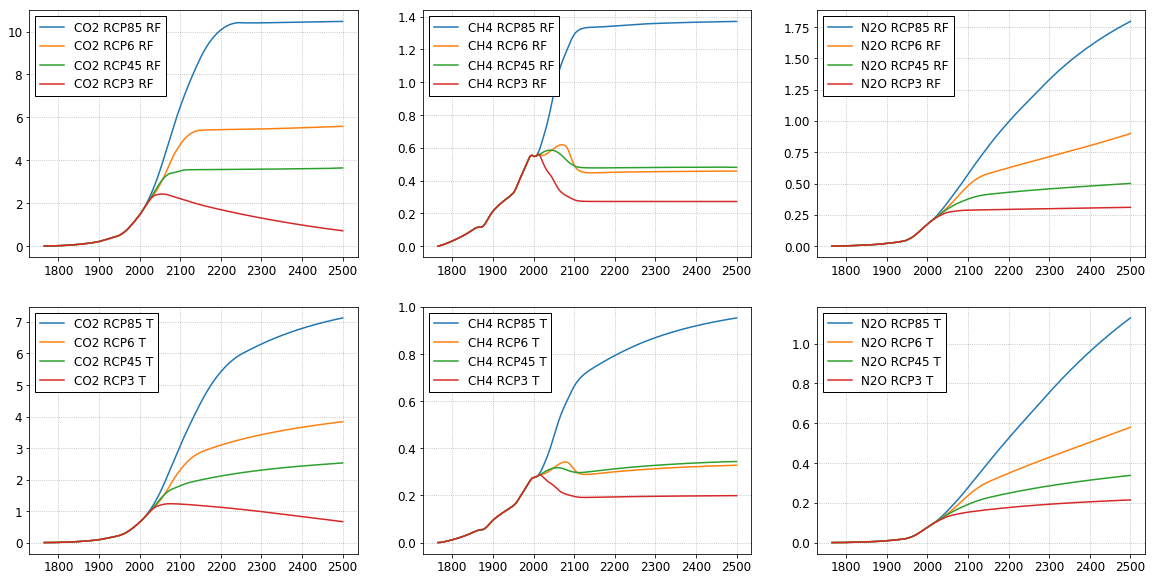

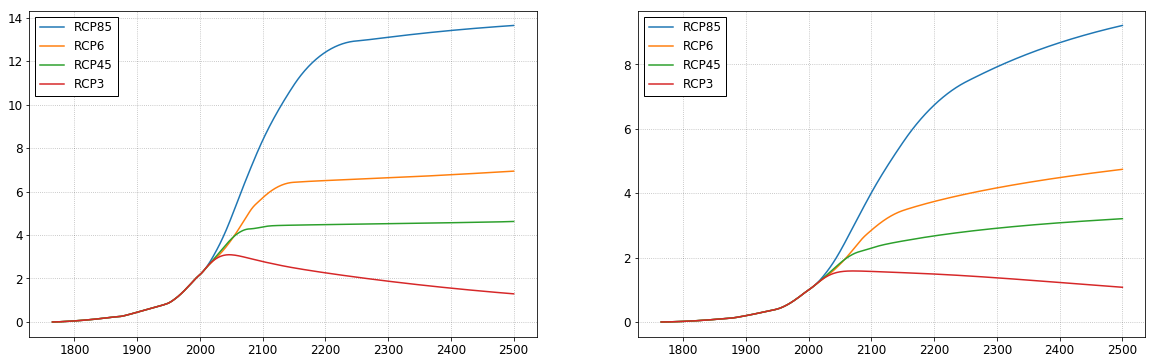

In [4]:
import pandas as pd
import copy
from matplotlib import pyplot as plt
# ----------------------------------

RCP = import_RCPs()
rcps = ['85','6','45','3']

emissions_CO2 = np.zeros((4,736))
emissions_CH4 = np.zeros((4,736))
emissions_N2O = np.zeros((4,736))

for n,rcp_val in enumerate(rcps):
    emissions_CO2[n,:] = RCP[rcp_val]['E'].FossilCO2.values + RCP[rcp_val]['E'].OtherCO2.values
    emissions_CH4[n,:] = RCP[rcp_val]['E'].CH4.values
    emissions_N2O[n,:] = RCP[rcp_val]['E'].N2O.values

# CO2 parameters
emis2conc_CO2 = 1/(5.148*10**18 / 1e18 * np.array([12.]) / 28.97)
a_CO2 = np.array([[0.2173,0.2240,0.2824,0.2763]])
tau_CO2 = np.array([[1000000,394.4,36.54,4.304]])
r_CO2 = np.array([[32.40,0.019,4.165,0.0]])
PI_C_CO2 = np.array([278.0])
f_CO2 = np.array([[3.74/np.log(2.),0.,0.]])

# CH4 parameters
emis2conc_CH4 = 1/(5.148*10**18 / 1e18 * np.array([16.]) / 28.97)
a_CH4 = np.array([[1.,0.,0.,0.]])
tau_CH4 = np.array([[9.,394.4,36.54,4.304]])
r_CH4 = np.array([[ 9.05942806e+00, -1.03745809e-07, -1.85711888e-01,  1.45117387e-04]])
PI_C_CH4 = np.array([722.0])
f_CH4 = np.array([[0,0.,0.036]])

# N2O parameters
emis2conc_N2O = 1/(5.148*10**18 / 1e18 * np.array([28.]) / 28.97)
a_N2O = np.array([[1.,0.,0.,0.]])
tau_N2O = np.array([[121.,394.4,36.54,4.304]])
r_N2O = np.array([[ 4.97443512e+01,  5.87120814e-04, -2.02130466e+00,  2.07719812e-02]])
PI_C_N2O = np.array([273.0])
f_N2O = np.array([[0,0,0.12]])

C_CO2,RF_CO2,T_CO2 = multiscen_oxfair(emissions=emissions_CO2,emis2conc=emis2conc_CO2,a=a_CO2,tau=tau_CO2,r=r_CO2,PI_C=PI_C_CO2,f=f_CO2,multigas=False,multiscen=True)
C_CH4,RF_CH4,T_CH4 = multiscen_oxfair(emissions=emissions_CH4,emis2conc=emis2conc_CH4,a=a_CH4,tau=tau_CH4,r=r_CH4,PI_C=PI_C_CH4,f=f_CH4,multigas=False,multiscen=True)
C_N2O,RF_N2O,T_N2O = multiscen_oxfair(emissions=emissions_N2O,emis2conc=emis2conc_N2O,a=a_N2O,tau=tau_N2O,r=r_N2O,PI_C=PI_C_N2O,f=f_N2O,multigas=False,multiscen=True)

CO2_results = {'C':C_CO2, 'RF':RF_CO2, 'T':T_CO2}
CH4_results = {'C':C_CH4, 'RF':RF_CH4, 'T':T_CH4}
N2O_results = {'C':C_N2O, 'RF':RF_N2O, 'T':T_N2O}

RCP_results = {'CO2':CO2_results,'CH4':CH4_results,'N2O':N2O_results}

fig, ax = plt.subplots(2,3,figsize=(20,10))
for i,key_gas in enumerate(RCP_results.keys()):
    for j,key_obj in enumerate(np.array(['RF','T'])):
        for k,rcp_val in enumerate(np.array(['85','6','45','3'])):
            ax[j,i].plot(np.arange(1765,2501), RCP_results[key_gas][key_obj][k,:],label=key_gas + ' RCP' + rcp_val + ' ' + key_obj)
        ax[j,i].legend(loc='best')
        
fig_tot, ax_tot = plt.subplots(1,2,figsize=(20,6))
for k,rcp_val in enumerate(np.array(['85','6','45','3'])):
    RF_tot = RCP_results['CO2']['RF'][k,:] + RCP_results['CH4']['RF'][k,:] + RCP_results['N2O']['RF'][k,:]
    T_tot = RCP_results['CO2']['T'][k,:] + RCP_results['CH4']['T'][k,:] + RCP_results['N2O']['T'][k,:]
    ax_tot[0].plot(np.arange(1765,2501), RF_tot, label='RCP' + rcp_val)
    ax_tot[1].plot(np.arange(1765,2501), T_tot, label='RCP' + rcp_val)
ax_tot[0].legend(loc='best')
ax_tot[1].legend(loc='best')

plt.show()